# Projekt PRiAD Natalia Biernacka, Anton Libik
### Wybrany zbiór danych: Titanic Survival Prediction Dataset


### Pobranie i wczytanie danych

Import niezbędnych pakietów

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

In [90]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") 
print("Path to dataset files:", path)

file_path = os.path.join(path, 'Titanic-Dataset.csv')
dane = pd.read_csv(file_path)
dane.head()

Path to dataset files: C:\Users\Anton\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Analiza eksploracyjna

#### Przygotowanie

1) Wyznaczamy liczbę obiektów, liczbę atrybutów. Usuwamy kolumny PassengetId, Ticket i Name - nie są one potrzebne dla dalszej analizy.


In [91]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

# usuwanie kolumny PassengerId i Name
dane.drop(columns=['PassengerId'], inplace=True)
dane.drop(columns=['Name'], inplace=True)
dane.drop(columns=['Ticket'], inplace=True)

Liczba obiektów: 891
Liczba atrybutow: 12


2. Liczba obiektów, reprezentujących pasażerów, którzy przeżyli (atrybut survived ma 1) i którzy nie (survived = 0)

In [92]:
survivedDF = dane[dane.Survived == 1]

notSurvivedDF = dane[dane.Survived == 0]

print("Liczba pasażerów, którzy przeżyli: ", survivedDF.shape[0])
print("Liczba pasażerów, którzy nie przeżyli: ", notSurvivedDF.shape[0])

procent = survivedDF.shape[0] / dane.shape[0] * 100
print("Ile procent przeżyło: ", round(procent, 2), "%")

Liczba pasażerów, którzy przeżyli:  342
Liczba pasażerów, którzy nie przeżyli:  549
Ile procent przeżyło:  38.38 %


3. Liczba brakujących danych w poszczególnych kolumnach

In [93]:
dane.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Usuwamy kolumnę "Cabin", ponieważ zawiera dużą liczbę brakujących danyh i będzie przeszkadać analizie. Zamiast brakujących danych w kolumnie "Age" wstawiamy dane średniego wieku.

In [94]:
# usuwamy kolumnę Cabin
dane.drop(columns=['Cabin'], inplace=True)

# wstawiamy średni wiek zamiast brakujących danych w kolumnie Age
dane['Age'] = dane['Age'].fillna(dane['Age'].median())

# sprawdzamy liczbę brakujących danych 
dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

5. Usuwamy pozostałe brakujące dane

In [95]:
dane = dane.dropna()

dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Zbiór został przygotowany do analizy ekploracyjnej, ostateczna liczba obiektów i atrybutów:

In [96]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

Liczba obiektów: 889
Liczba atrybutow: 8


#### Analiza zmienności atrybutów bez odniesienia do przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    889.00  889.00 889.00 889.00 889.00 889.00
mean       0.38    2.31  29.32   0.52   0.38  32.10
std        0.49    0.83  12.98   1.10   0.81  49.70
min        0.00    1.00   0.42   0.00   0.00   0.00
25%        0.00    2.00  22.00   0.00   0.00   7.90
50%        0.00    3.00  28.00   0.00   0.00  14.45
75%        1.00    3.00  35.00   1.00   0.00  31.00
max        1.00    3.00  80.00   8.00   6.00 512.33


<Axes: xlabel='Embarked', ylabel='Count'>

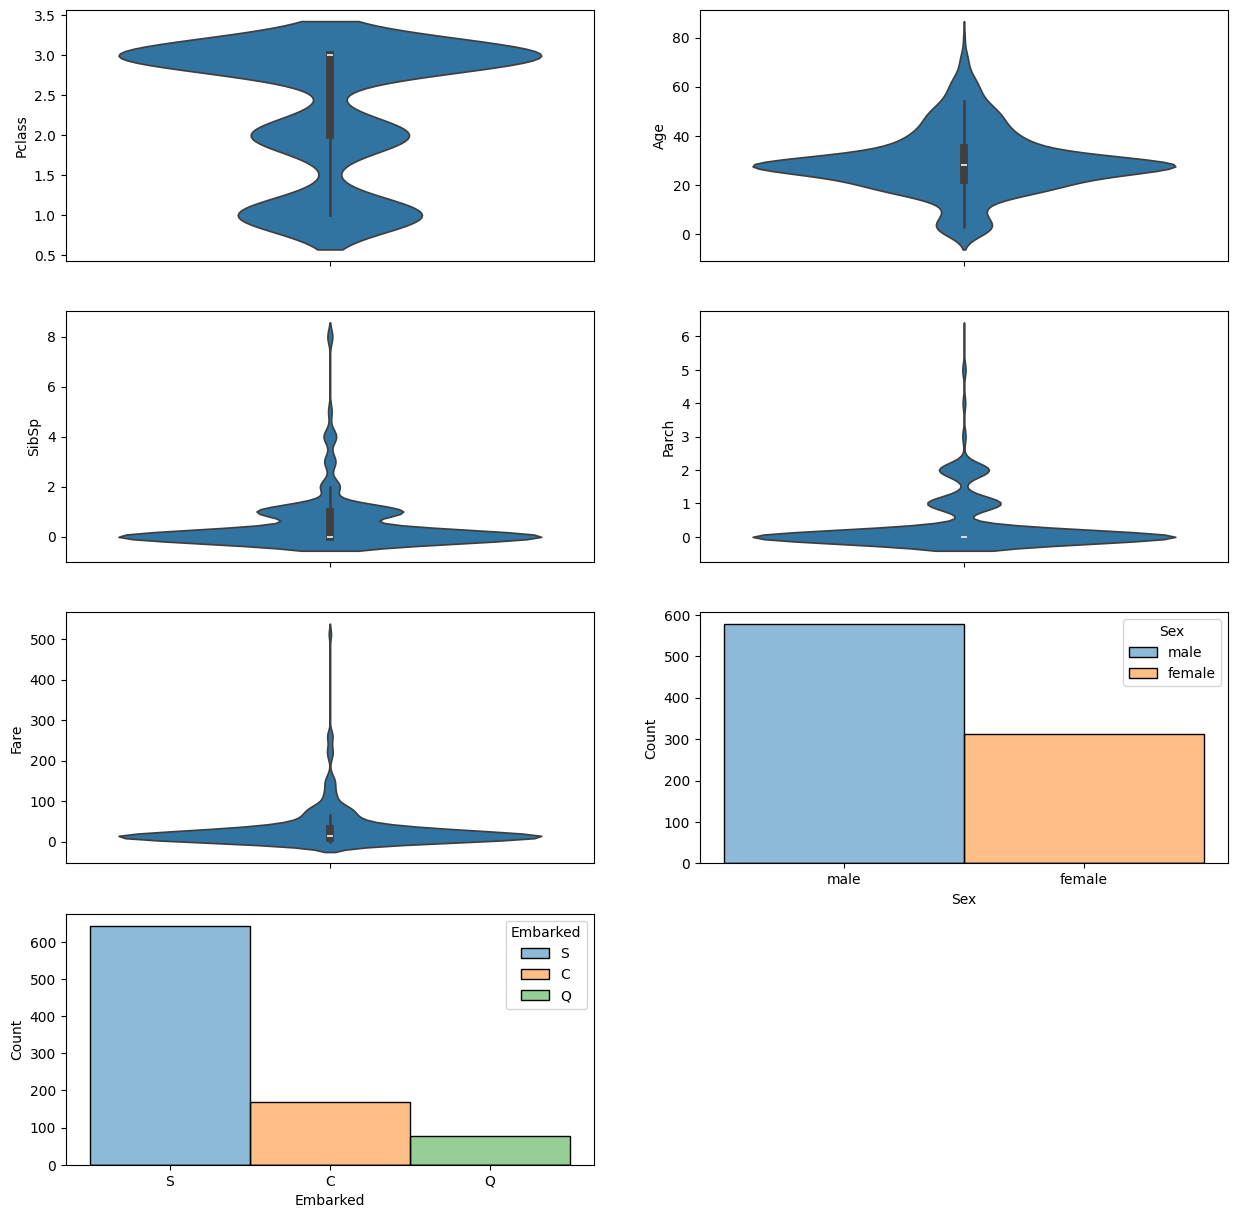

In [97]:
print(dane.describe())

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.violinplot(data=dane['Pclass'])
plt.subplot(4,2,2)
sns.violinplot(data=dane['Age'])
plt.subplot(4,2,3)
sns.violinplot(data=dane['SibSp'])
plt.subplot(4,2,4)
sns.violinplot(data=dane['Parch'])
plt.subplot(4,2,5)
sns.violinplot(data=dane['Fare'])
plt.subplot(4,2,6)
sns.histplot(data=dane, x="Sex", hue="Sex")
plt.subplot(4,2,7)
sns.histplot(data=dane, x="Embarked", hue="Embarked")

#### Analiza zmienności atrybutów w zależności od przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    549.00  549.00 549.00 549.00 549.00 549.00
mean       0.00    2.53  30.03   0.55   0.33  22.12
std        0.00    0.74  12.50   1.29   0.82  31.39
min        0.00    1.00   1.00   0.00   0.00   0.00
25%        0.00    2.00  23.00   0.00   0.00   7.85
50%        0.00    3.00  28.00   0.00   0.00  10.50
75%        0.00    3.00  35.00   1.00   0.00  26.00
max        0.00    3.00  74.00   8.00   6.00 263.00
       Survived  Pclass    Age  SibSp  Parch   Fare
count    340.00  340.00 340.00 340.00 340.00 340.00
mean       1.00    1.96  28.16   0.48   0.47  48.21
std        0.00    0.86  13.67   0.71   0.77  66.75
min        1.00    1.00   0.42   0.00   0.00   0.00
25%        1.00    1.00  21.00   0.00   0.00  12.44
50%        1.00    2.00  28.00   0.00   0.00  26.00
75%        1.00    3.00  35.00   1.00   1.00  56.95
max        1.00    3.00  80.00   4.00   5.00 512.33


<Axes: xlabel='Survived', ylabel='count'>

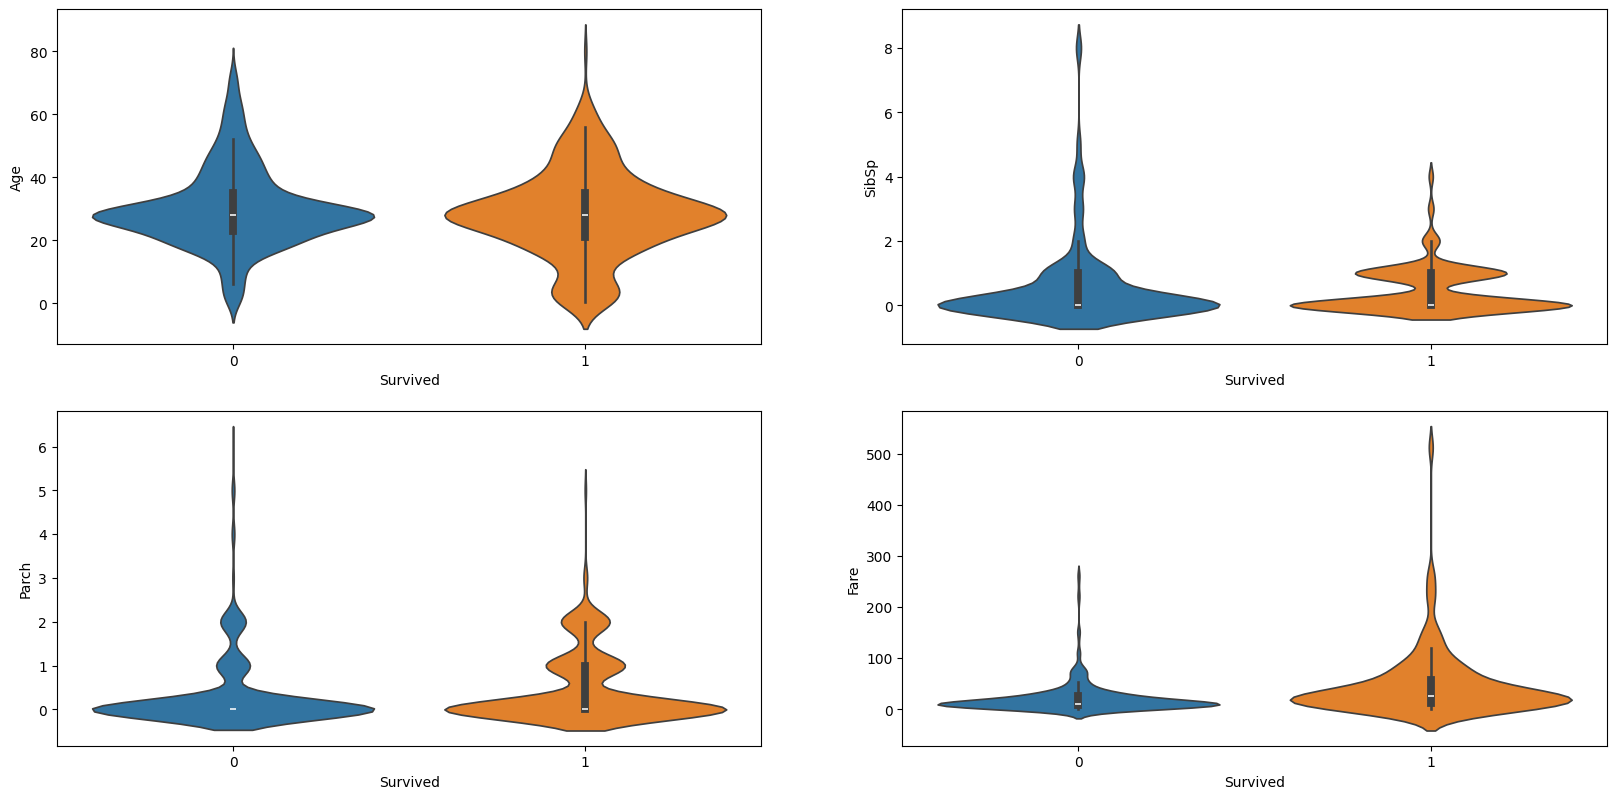

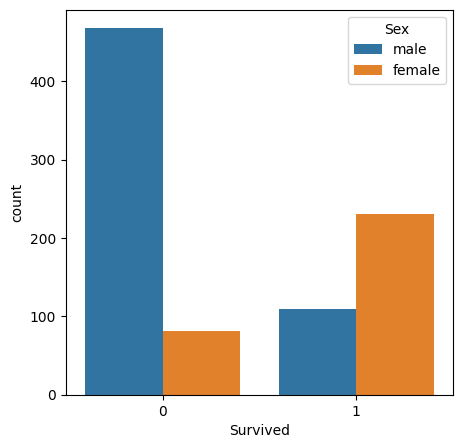

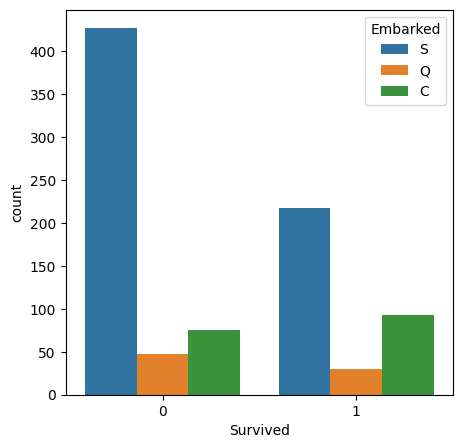

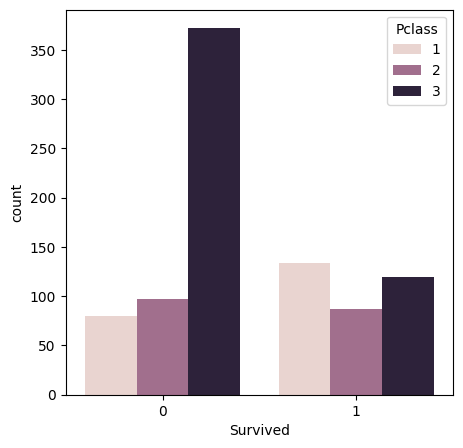

In [98]:
print(dane[dane['Survived'] == 0].describe())
print(dane[dane['Survived'] == 1].describe())
plt.figure(figsize= (20,20))
plt.subplot(4, 2, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=dane, legend=False, hue = 'Survived')
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Sex")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Embarked")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Pclass")

Wnioski
* Rozkład wartości atrybutów Age, SibSp, Parch i Fare dla pasażerów, którzy przeżyli i nie przeżyli jest podobny. Możemy zaobserwować, że w przypadku grupy dzieci (wiek ok. 10 lat) oraz osób, których cena biletu wynosiła powyżej 100, większość przezyła
* Przeżywalność jest w dużym stopniu zależna od płci. Większość kobiet przeżyła, zaś znaczna większość mężczyzn zginęła.
* Port, z którego pasażer wszedł na pokład nie ma większego znaczenia.
* Na przeżywalność silnie wpłynęła klasa, w której podróżował pasażer - większość osób z klasy 1 przeżyła zaś z klasy 3 zdecydowana większość zginęła

##### Wykres punktowy

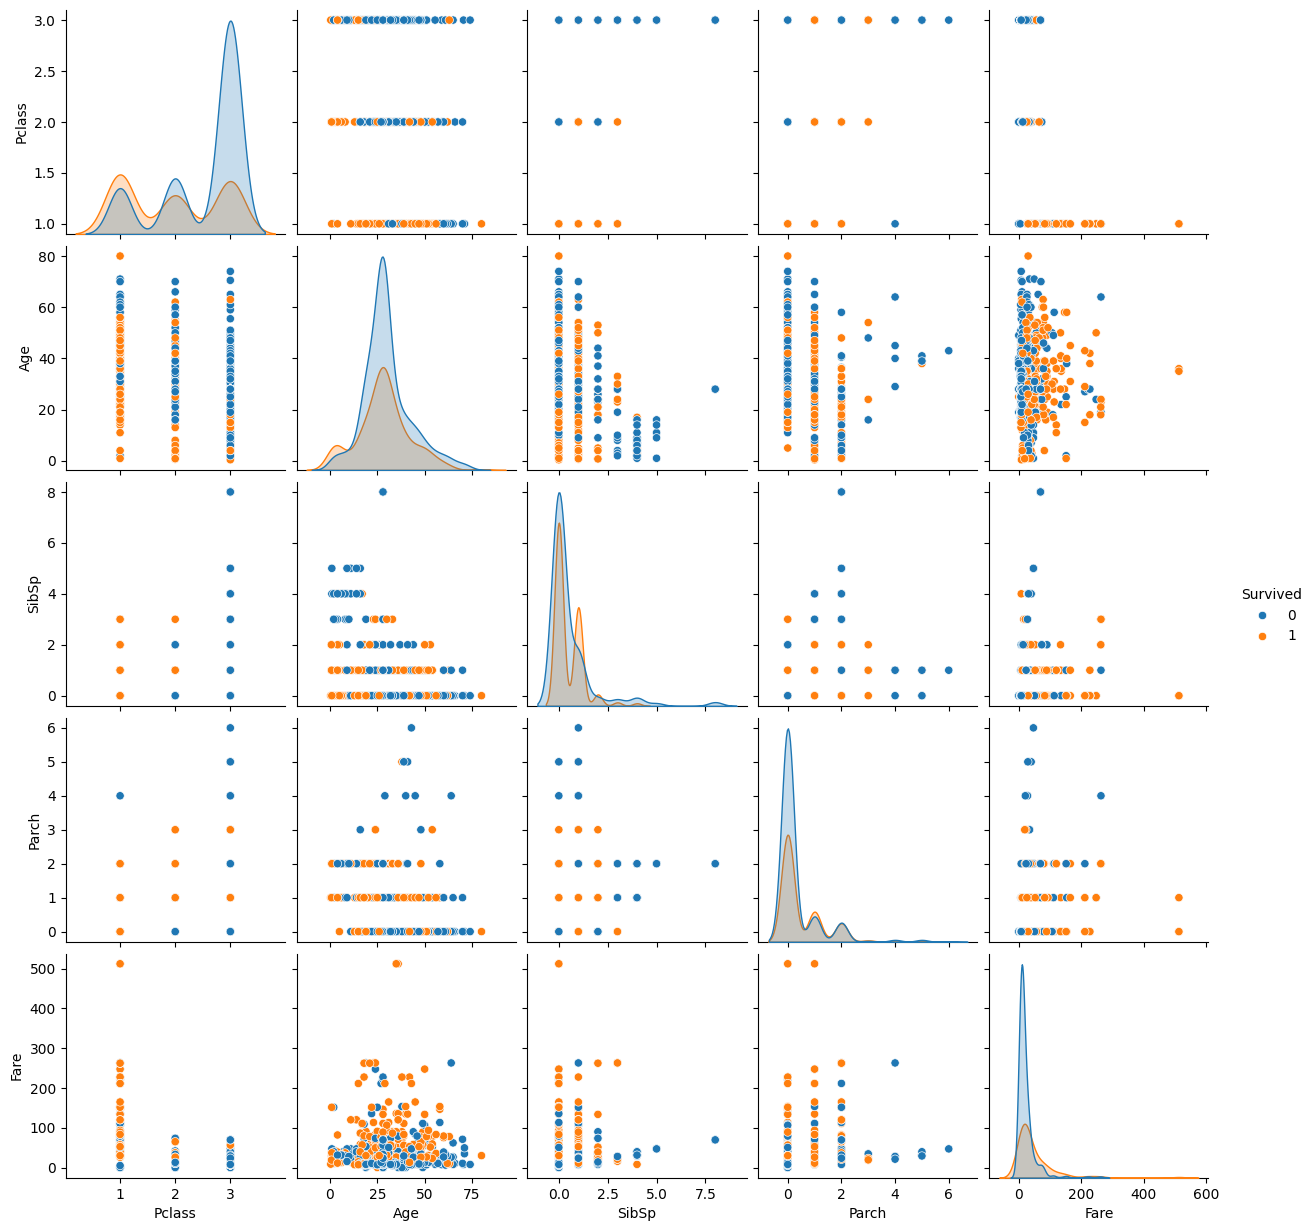

In [99]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

#### Korelacja

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.34   0.08   0.02 -0.55
Age          -0.07   -0.34  1.00  -0.23  -0.17  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.17   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


<Axes: >

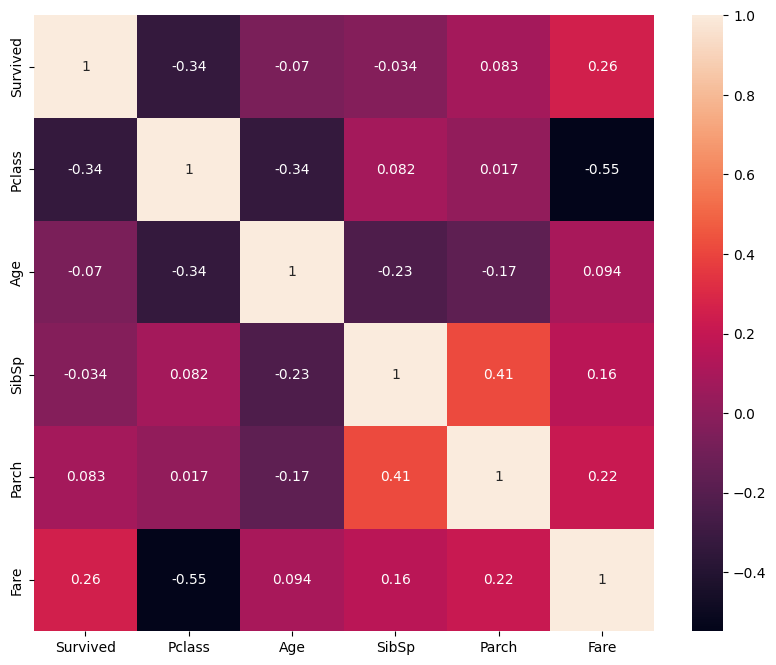

In [100]:
kor = dane.loc[:, np.logical_and(dane.columns != "Sex", dane.columns != "Embarked")].corr()
print(kor)
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

Wnioski:
* najsilniej skolerowane są cena biletu (Fare) oraz klasa (Pclass) - cena biletu wyższa dla klasy 1, nieco niższa dla klasy 2 i najniższa dla klasy 3
* z przeżywalnością (survived) najsilniej skolerowana jest klasa, co potwierdza wnioski z analizy zmienności atrybutów

### Uczenie nadzorowane

#### Przygotowanie

Żeby wygodniej było prowadzić uczenie nadzorowane, zamieniamy wartości column Sex i Embarked na wartości liczbowe według następnego schematu:  
Sex - (male => 1, female => 0),  
Emarked - (C => 1, S => 2, Q => 3)

In [101]:
print(dane.head())

dane['Sex'] = np.where(dane['Sex'] == 'male', 1, 0)
dane['Embarked'] = np.where(dane['Embarked'] == 'C', 1, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'S', 2, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'Q', 3, dane['Embarked'])

print(dane.head())

   Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    male 22.00      1      0  7.25        S
1         1       1  female 38.00      1      0 71.28        C
2         1       3  female 26.00      0      0  7.92        S
3         1       1  female 35.00      1      0 53.10        S
4         0       3    male 35.00      0      0  8.05        S
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    1 22.00      1      0  7.25        2
1         1       1    0 38.00      1      0 71.28        1
2         1       3    0 26.00      0      0  7.92        2
3         1       1    0 35.00      1      0 53.10        2
4         0       3    1 35.00      0      0  8.05        2


Wykres punktowy, który pozwoli na określenie, które atrybuty są bardziej, a które mniej istotne w kontekscie uczenia nadzorowanego

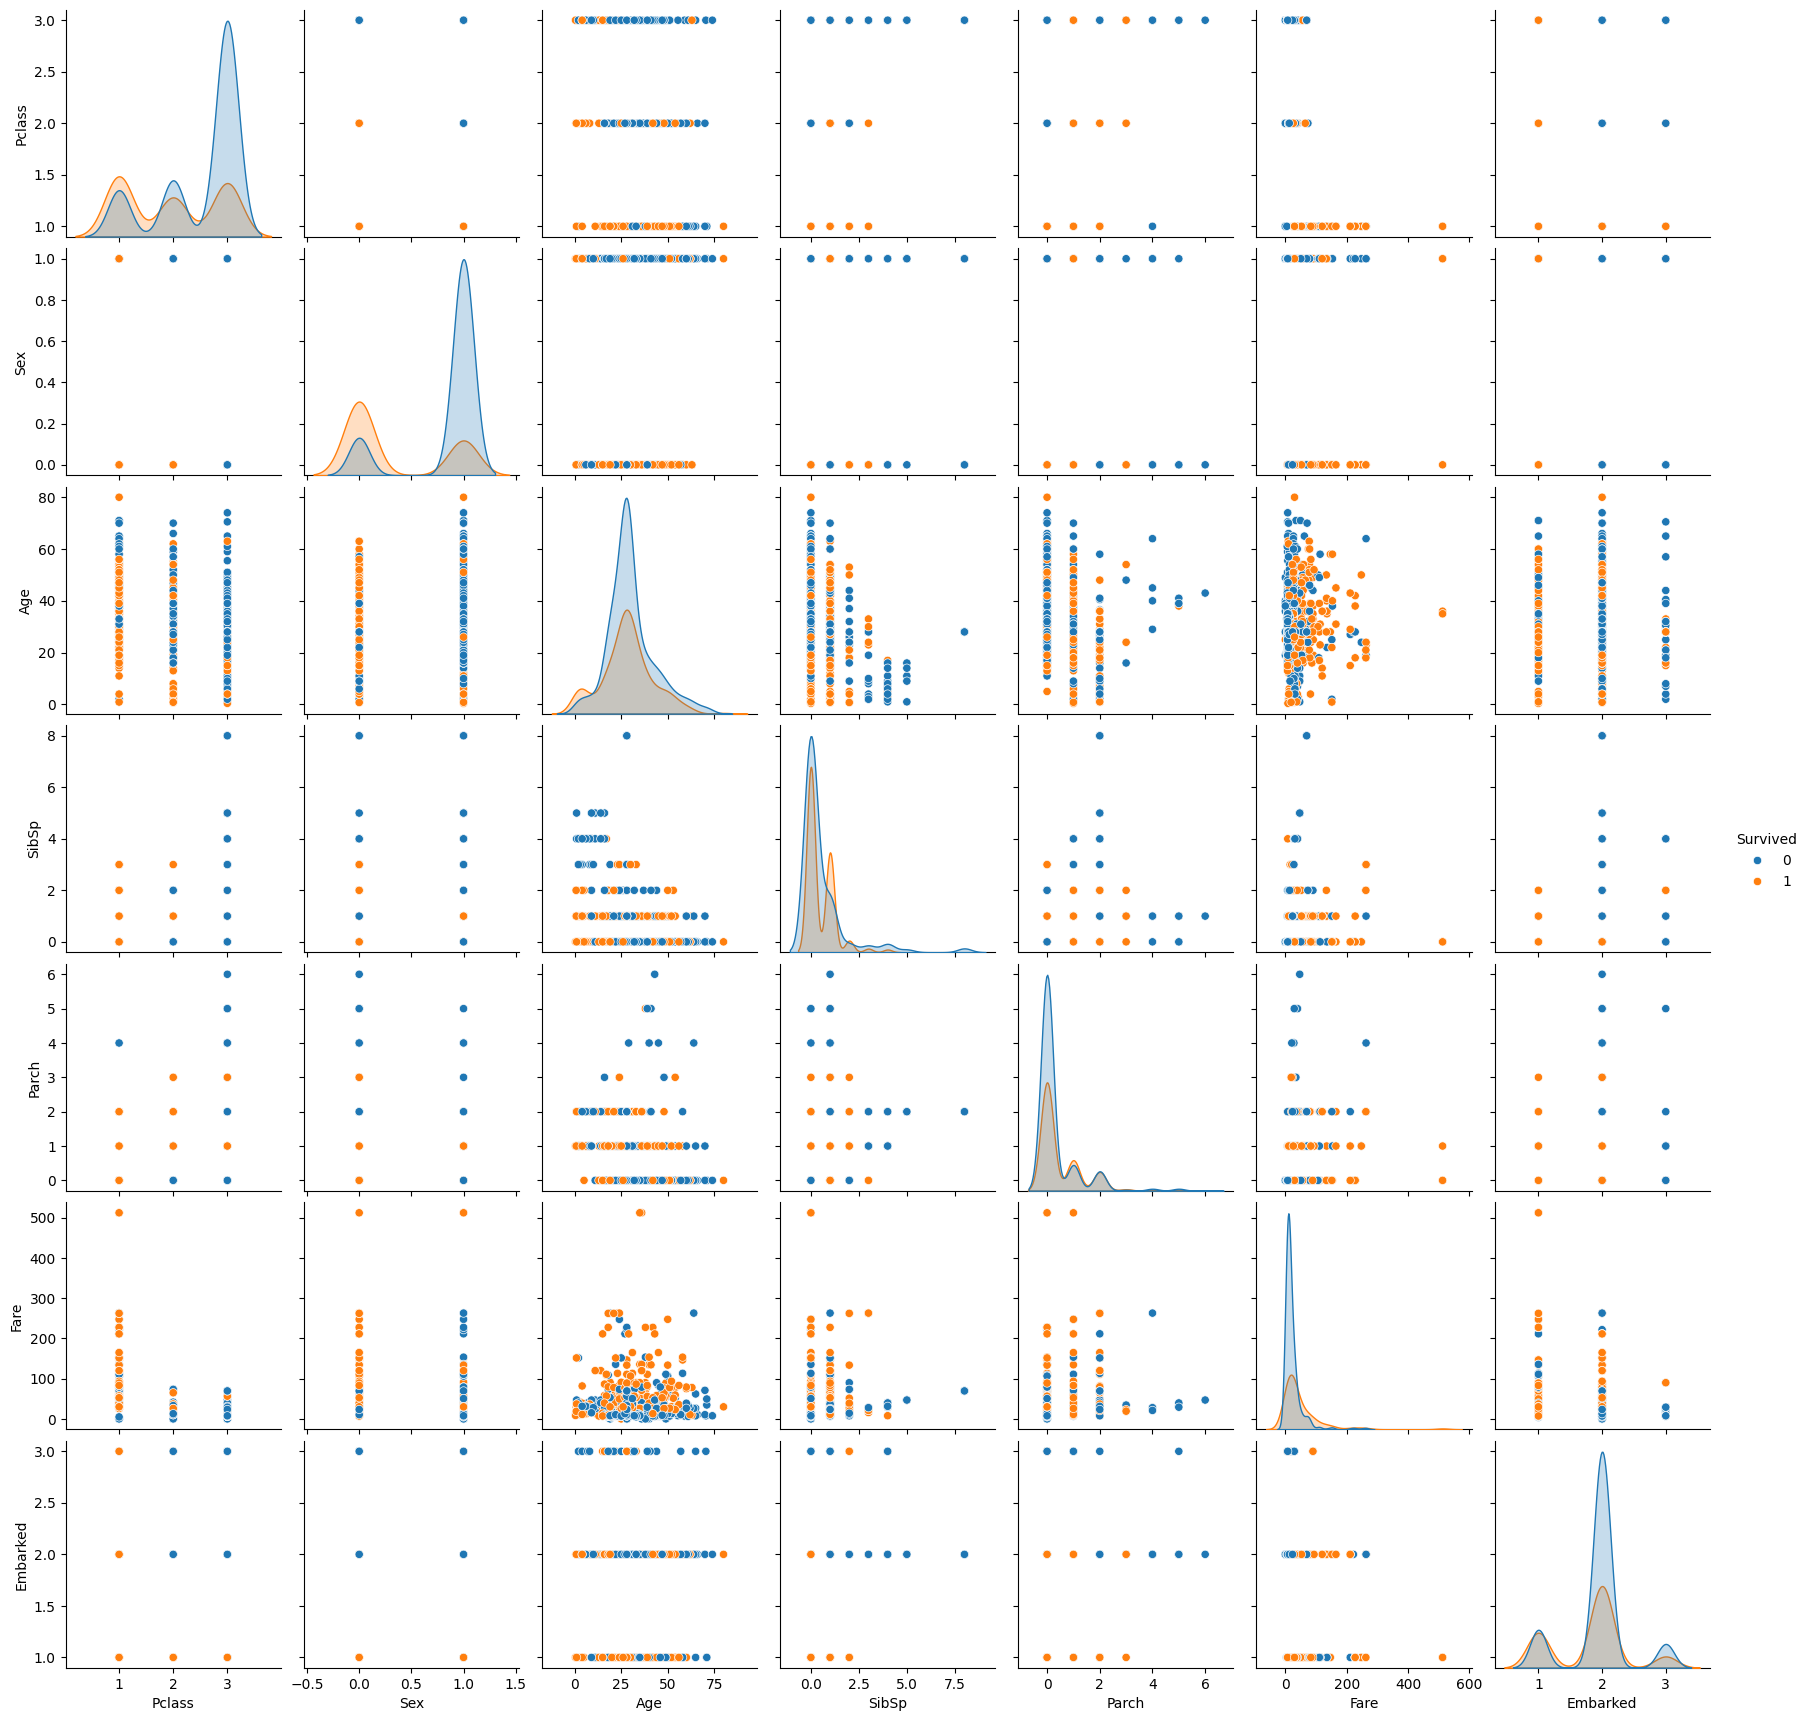

In [102]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

Z wykresu punktowego możemy wyciągnąć wniosek, że najbardziej istotnymi dla nas będą pary atrybutów: Sex i Pclass, Pclass i Embarked, Sex i Age, Fare i Sex, Sex i Embarked

#### Import niezbędnych pakietów oraz funkcje dzielenia zbioru na ucząct i testowy, weryfikacji i wyświtlenia granic

In [103]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def podziel(dane,proporcja):
    df = dane.copy()
    # for col in df.columns:
    #     if df[col].dtype == 'object':
    #         le = LabelEncoder()
    #         df[col] = le.fit_transform(df[col])
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    print(score1)
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    print(score2)
    print(mp) 
    return [score1, score2]

def dokladnosc(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    return [score1, score2]

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # for col in dane["opis_ucz"].columns:
    #     if dane["opis_ucz"][col].dtype == 'object':
    #         le = LabelEncoder()
    #         dane["opis_ucz"][col] = le.fit_transform(dane["opis_ucz"][col])
    #         dane["opis_test"][col] = le.transform(dane["opis_test"][col])
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wybrane pary atrybutów dla uczenia nadzorowanego i podział zbioru danych

In [104]:
atrybuty = [ ['Sex', 'Pclass'], ['Pclass', 'Embarked'], ['Sex', 'Age'], ['Fare', 'Sex'], ['Sex', 'Embarked']]

# podział zbioru danych
dane_podzielone = podziel(dane,0.3)

#### Metoda k-najbliższych sąsiadów.

macierz pomyłek - zbiór uczący, dokładność: 0.684887459807074
0.684887459807074
[[332  54]
 [142  94]]
macierz pomyłek - zbiór testowy, dokładność: 0.6629213483146067
0.6629213483146067
[[137  26]
 [ 64  40]]
macierz pomyłek - zbiór uczący, dokładność: 0.6270096463022508
0.6270096463022508
[[279 107]
 [125 111]]
macierz pomyłek - zbiór testowy, dokładność: 0.6142322097378277
0.6142322097378277
[[115  48]
 [ 55  49]]
macierz pomyłek - zbiór uczący, dokładność: 0.7556270096463023
0.7556270096463023
[[376  10]
 [142  94]]
macierz pomyłek - zbiór testowy, dokładność: 0.6928838951310862
0.6928838951310862
[[147  16]
 [ 66  38]]
macierz pomyłek - zbiór uczący, dokładność: 0.8488745980707395
0.8488745980707395
[[376  10]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7565543071161048
0.7565543071161048
[[146  17]
 [ 48  56]]
macierz pomyłek - zbiór uczący, dokładność: 0.6881028938906752
0.6881028938906752
[[293  93]
 [101 135]]
macierz pomyłek - zbiór testowy, dokładność: 0.670411

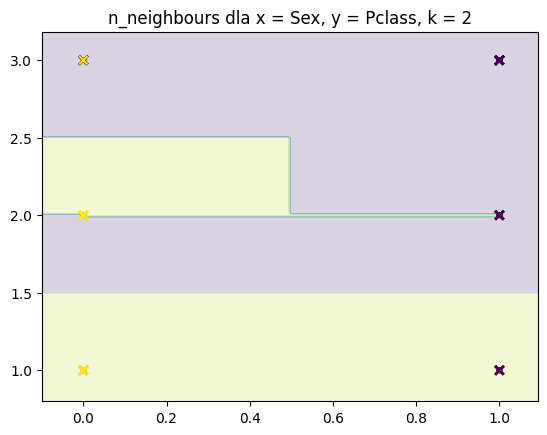

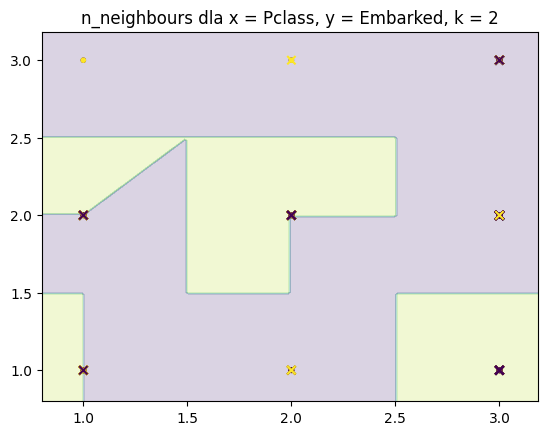

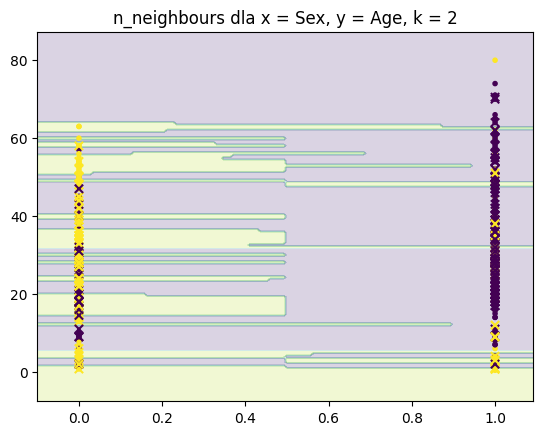

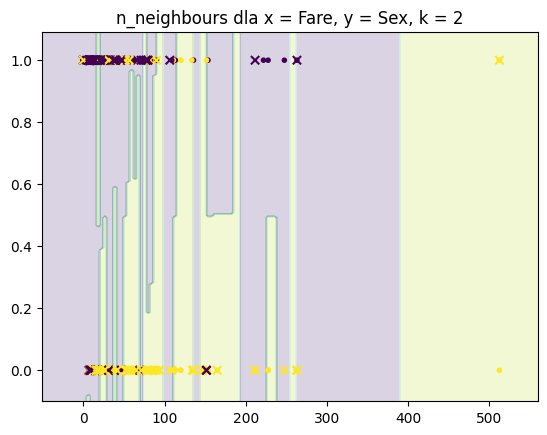

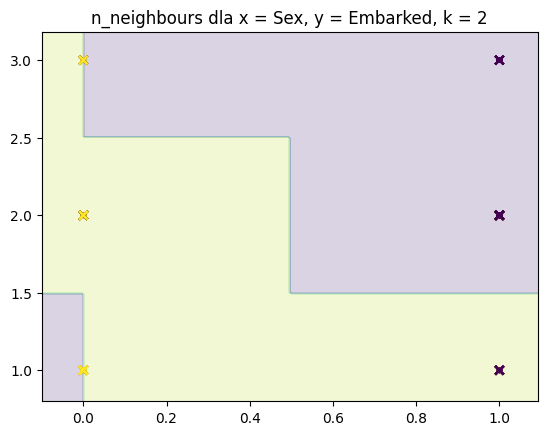

In [135]:
#wybór liczby sąsiadów
k = 2

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2 + ", k = " + str(k))

Najlepsze wyniki metoda KNN pokazuje dla pary atrybutów Sex i Fare.  
Teraz w celu doboru właściwej ilości sąsiadów można wykonać analizę błędu klasyfikacji dla różnej ilości sąsiadów.

Text(0, 0.5, 'Prawdopodobienstwo bledu')

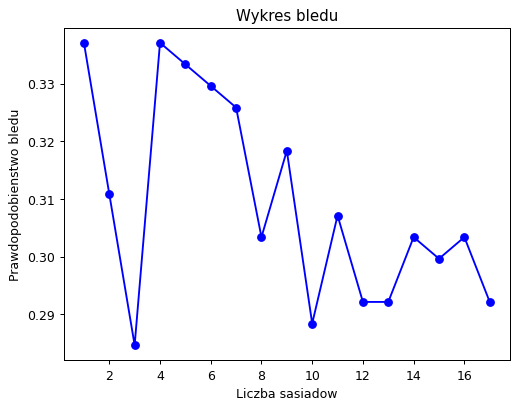

In [254]:

kvals = range(1,18)
rss_all = np.zeros(17)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(dane_podzielone['opis_ucz'],dane_podzielone['dec_ucz'])
    predictions = model.predict(dane_podzielone['opis_test'])
    rss_all[k-1] = 1-model.score(dane_podzielone['opis_test'],dane_podzielone['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

Optymalna liczba sąsiadów: 3

#### Drzewa decyzyjne

macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722846442
0.7902621722846442
[[132  31]
 [ 25  79]]
macierz pomyłek - zbiór uczący, dokładność: 0.684887459807074
0.684887459807074
[[333  53]
 [143  93]]
macierz pomyłek - zbiór testowy, dokładność: 0.6629213483146067
0.6629213483146067
[[137  26]
 [ 64  40]]
macierz pomyłek - zbiór uczący, dokładność: 0.815112540192926
0.815112540192926
[[352  34]
 [ 81 155]]
macierz pomyłek - zbiór testowy, dokładność: 0.7940074906367042
0.7940074906367042
[[137  26]
 [ 29  75]]
macierz pomyłek - zbiór uczący, dokładność: 0.8488745980707395
0.8488745980707395
[[355  31]
 [ 63 173]]
macierz pomyłek - zbiór testowy, dokładność: 0.797752808988764
0.797752808988764
[[132  31]
 [ 23  81]]
macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722

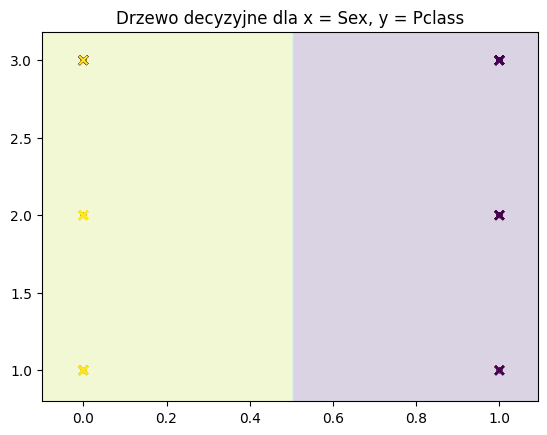

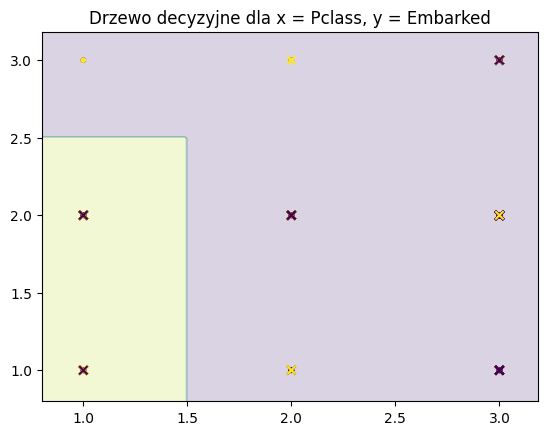

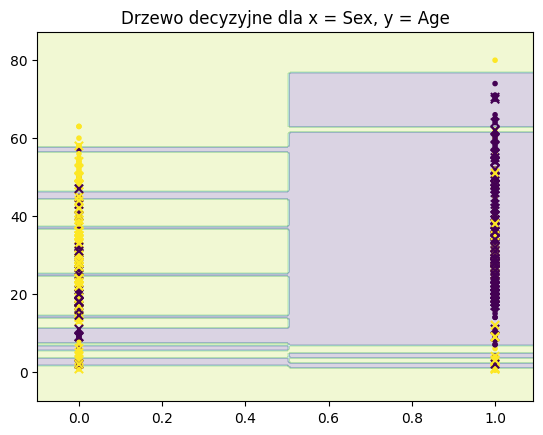

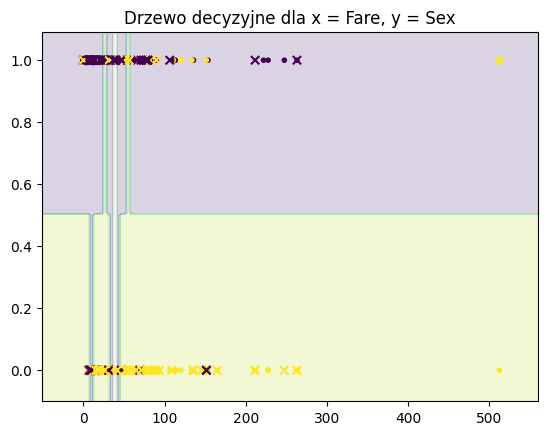

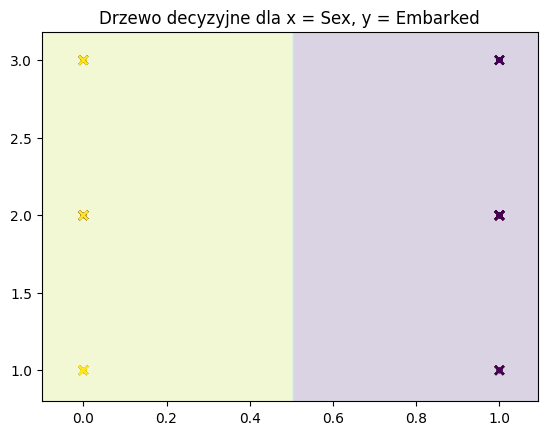

In [230]:
#głębokość drzewa
depth = 8
# zdefiniowanie modelu 
model = tree.DecisionTreeClassifier(max_depth=depth)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Drzewo decyzyjne dla x = " + atrybut_1 + ", y = " + atrybut_2)

Drzewo decyzyjne, jak i metoda KNN, najlepszy wynik pokazuje dla pary atrybutów: Sex, Fare.  
Przeanalizujemy teraz dla tej pary drzewa o różnych głebokościach

macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722846442
0.7902621722846442
[[132  31]
 [ 25  79]]
macierz pomyłek - zbiór uczący, dokładność: 0.7990353697749196
0.7990353697749196
[[337  49]
 [ 76 160]]
macierz pomyłek - zbiór testowy, dokładność: 0.797752808988764
0.797752808988764
[[131  32]
 [ 22  82]]
macierz pomyłek - zbiór uczący, dokładność: 0.8183279742765274
0.8183279742765274
[[346  40]
 [ 73 163]]
macierz pomyłek - zbiór testowy, dokładność: 0.797752808988764
0.797752808988764
[[131  32]
 [ 22  82]]
macierz pomyłek - zbiór uczący, dokładność: 0.8488745980707395
0.8488745980707395
[[355  31]
 [ 63 173]]
macierz pomyłek - zbiór testowy, dokładność: 0.797752808988764
0.797752808988764
[[132  31]
 [ 23  81]]
macierz pomyłek - zbiór uczący, dokładność: 0.8729903536977492
0.8729903536977492
[[366  20]
 [ 59 177]]
macierz pomyłek - zbiór testowy, dokładność: 0.8089887640

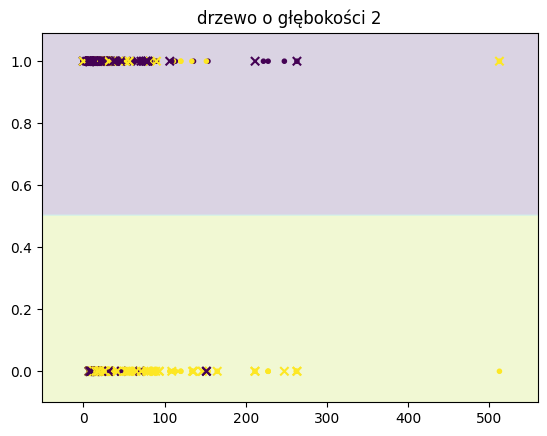

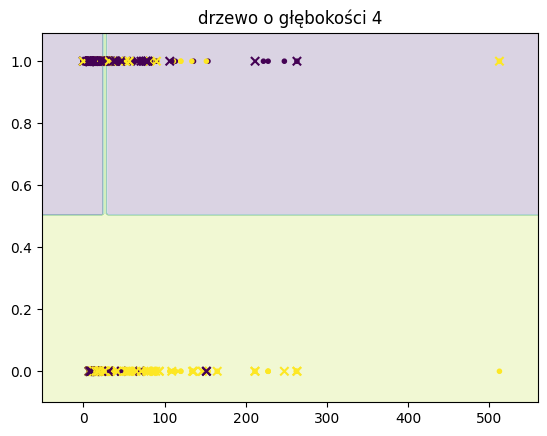

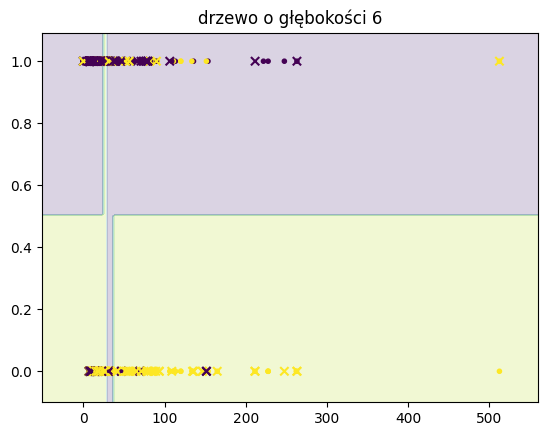

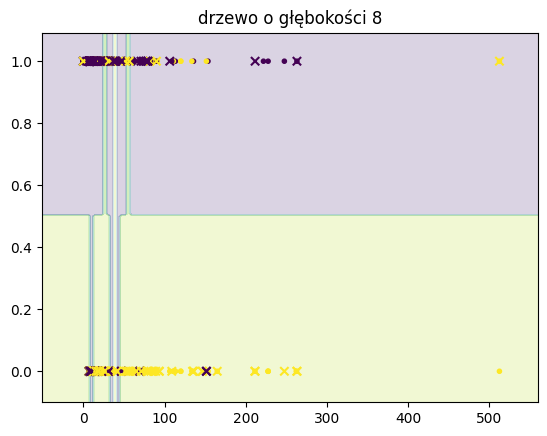

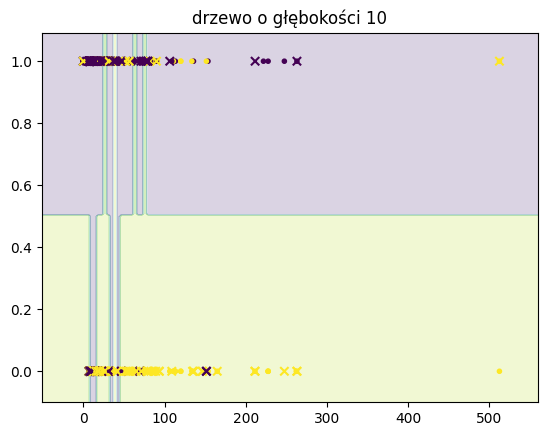

In [244]:
atrybut_1  = 'Fare'
atrybut_2 = 'Sex'

atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1
for g in [2,4,6,8,10]:
    drzewo = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "drzewo o głębokości " + str(g) 
    granice(drzewo ,dane_podzielone,atrybut_1_index,atrybut_2_index,tekst)
    weryfikuj(drzewo,dane_podzielone,[atrybut_1_index,atrybut_2_index])


Wnioski: Drzewo decyzyjne najlepiej działa dla takich samych atrybutów, co i metoda KNN  
Maksymalna głębokość drzewa do określonej wartości wpływa na jakość klasyfikacji. Im większa maksymalna możliwa głębokość drzewa, tym mniej błędów popełnia model.

#### Metoda najbliższych prototypów

macierz pomyłek - zbiór uczący, dokładność: 0.7411575562700965
0.7411575562700965
[[326  60]
 [101 135]]
macierz pomyłek - zbiór testowy, dokładność: 0.7715355805243446
0.7715355805243446
[[137  26]
 [ 35  69]]
macierz pomyłek - zbiór uczący, dokładność: 0.6559485530546624
0.6559485530546624
[[261 125]
 [ 89 147]]
macierz pomyłek - zbiór testowy, dokładność: 0.6928838951310862
0.6928838951310862
[[111  52]
 [ 30  74]]
macierz pomyłek - zbiór uczący, dokładność: 0.4565916398713826
0.4565916398713826
[[140 246]
 [ 92 144]]
macierz pomyłek - zbiór testowy, dokładność: 0.449438202247191
0.449438202247191
[[ 56 107]
 [ 40  64]]
macierz pomyłek - zbiór uczący, dokładność: 0.6607717041800643
0.6607717041800643
[[329  57]
 [154  82]]
macierz pomyłek - zbiór testowy, dokładność: 0.6629213483146067
0.6629213483146067
[[138  25]
 [ 65  39]]
macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.790262

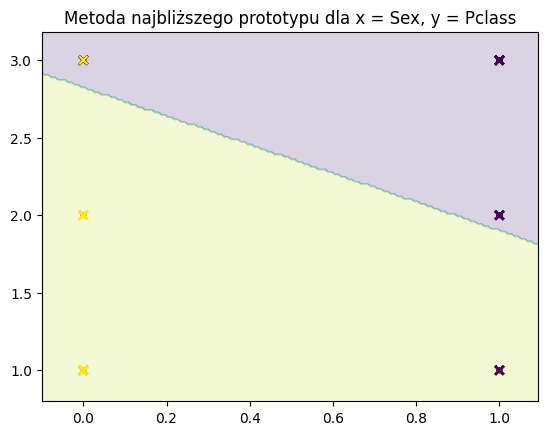

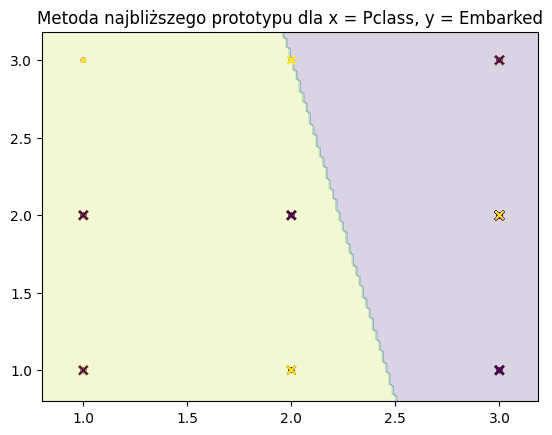

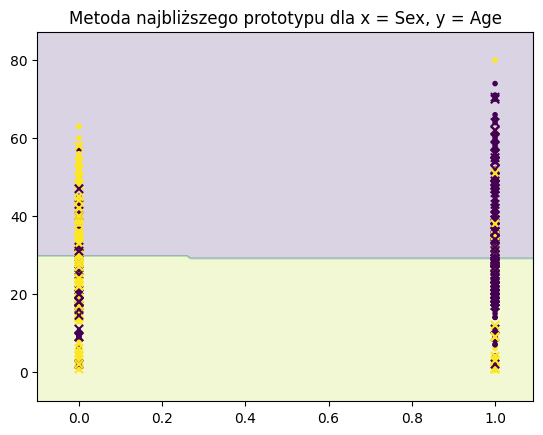

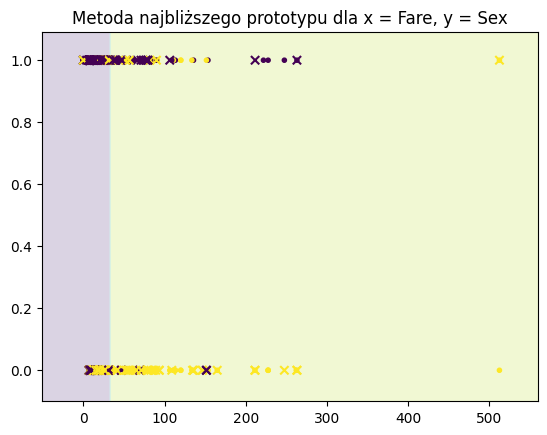

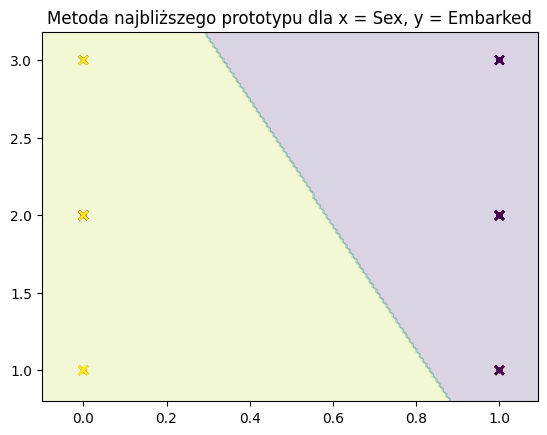

In [255]:
# zdefiniowanie modelu 
model = NearestCentroid()

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Metoda najbliższego prototypu dla x = " + atrybut_1 + ", y = " + atrybut_2)

Wnioski:
W odróżnieniu od kalsyfikatorów KNN i Drzewa decyzyjnego, klasyfikator najbliższego prototypu pokazuje gorze wyniki. Ale ta metoda oszczędza pamięć i czas przez redukcję zbioru uczącego do zbioru składającego się z prototypów klas, co jest główną zaletą tej metody.  
Najlepiej dopasowaną do tej metody para atrybutów to nie Sex i Fare, jak w poprzednich metodach, a Sex i Embarked

#### Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722846442
0.7902621722846442
[[132  31]
 [ 25  79]]
macierz pomyłek - zbiór uczący, dokładność: 0.6784565916398714
0.6784565916398714
[[325  61]
 [139  97]]
macierz pomyłek - zbiór testowy, dokładność: 0.6816479400749064
0.6816479400749064
[[136  27]
 [ 58  46]]
macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722846442
0.7902621722846442
[[132  31]
 [ 25  79]]
macierz pomyłek - zbiór uczący, dokładność: 0.7797427652733119
0.7797427652733119
[[327  59]
 [ 78 158]]
macierz pomyłek - zbiór testowy, dokładność: 0.7827715355805244
0.7827715355805244
[[129  34]
 [ 24  80]]
macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[336  50]
 [ 84 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902

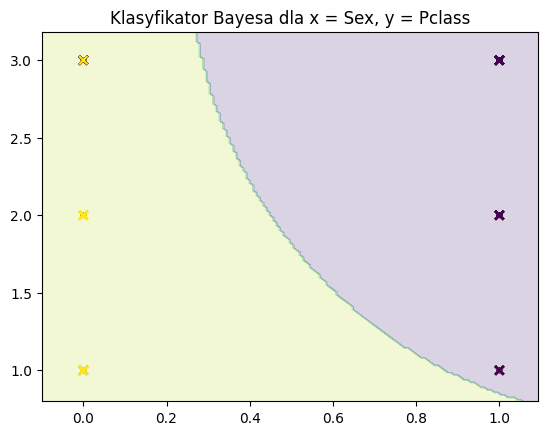

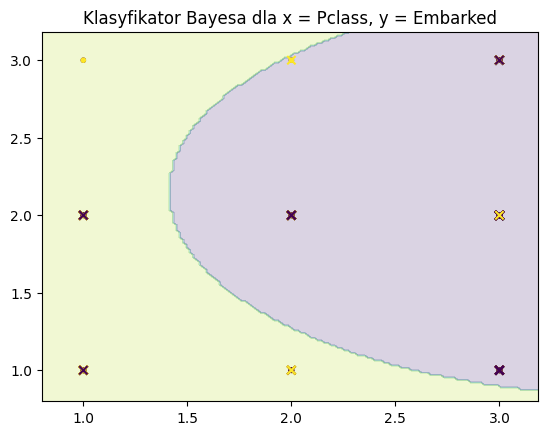

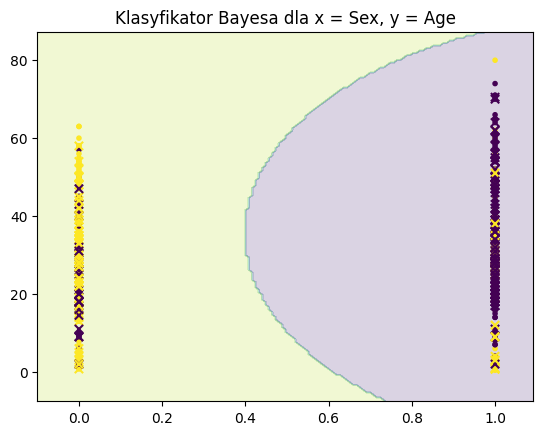

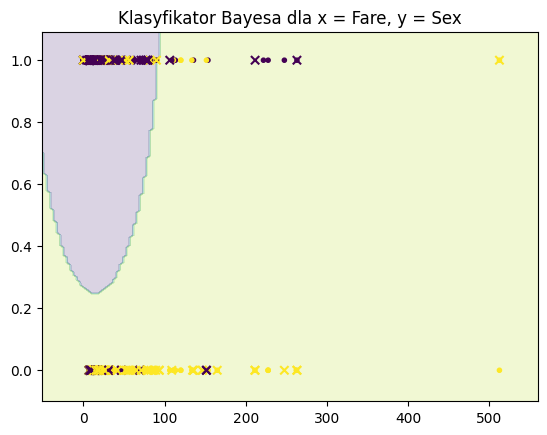

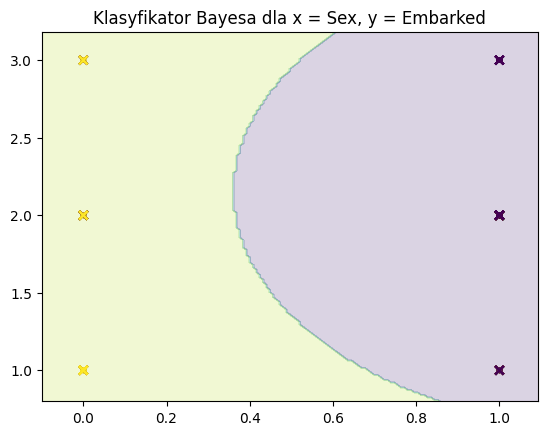

In [107]:
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = GaussianNB()

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Klasyfikator Bayesa dla x = " + atrybut_1 + ", y = " + atrybut_2)

### Osobny model Bayesa dla kobiet i mężczyzn

Wykonano kilka pdziałów na zbiór testowy i uczący
bez uwzględnienia płci
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6881028938906752
0.6881028938906752
[[321  62]
 [132 107]]
macierz pomyłek - zbiór testowy, dokładność: 0.6629213483146067
0.6629213483146067
[[139  27]
 [ 63  38]]
Uśredniona dokładność dla zbioru uczącego: 0.6811361200428724
Uśredniona dokładność dla zbioru testowego: 0.6766541822721598

z uwzględnieniem płci
Atrybuty: Sex, Pclass
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7829581993569131
0.7829581993569131
[[326  57]
 [ 78 161]]
macierz pomyłek - zbiór testowy, dokładność: 0.7940074906367042
0.7940074906367042
[[142  24]
 [ 31  70]]
Uśredniona dokładność dla zbioru uczącego: 0.7861736334405145
Uśredniona dokładność dla zbioru testowego: 0.7865168539325843

z uwzględnieniem płci
Atrybuty: Sex, Embarked
Weryfikacja klasyfikacji dla jednego z

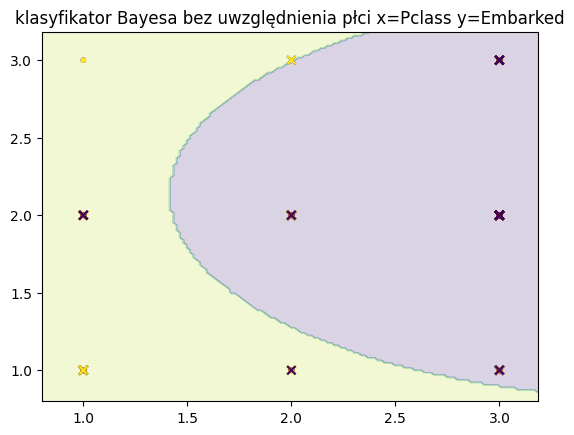

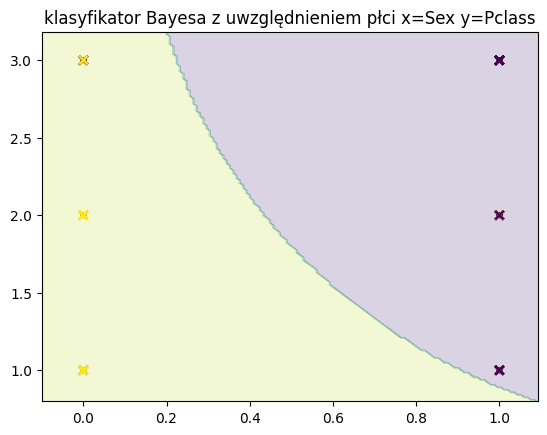

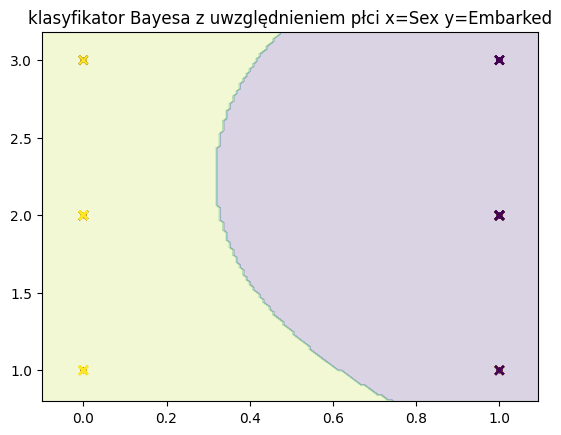

In [108]:
def show_output1(dane, a1, a2, klasyfikator, name):
    print(name)
    pom1 = 0
    pom2 = 0
    n=3
    for i in range(n):
        d = podziel(dane, 0.3)
        model = GaussianNB()
        [s1, s2] = dokladnosc(model,d,[a1,a2])
        pom1=pom1+s1
        pom2=pom2+s2
    print("Atrybuty: "+str(d["opis_ucz"].columns[a1])+", "+str(d["opis_ucz"].columns[a2]))
    print("Weryfikacja klasyfikacji dla jednego z podziałów")
    weryfikuj(model,d,[a1,a2])
    print("Uśredniona dokładność dla zbioru uczącego:", pom1/n)
    print("Uśredniona dokładność dla zbioru testowego:", pom2/n)
    print()
    granice(model,d,a1,a2,"klasyfikator "+klasyfikator+" "+str(name)+" x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))

print("Wykonano kilka pdziałów na zbiór testowy i uczący")
a1=0
a2=6
show_output1(dane, a1,a2, "Bayesa","bez uwzględnienia płci")
show_output1(dane, 1,a1, "Bayesa","z uwzględnieniem płci")
show_output1(dane, 1,a2, "Bayesa","z uwzględnieniem płci")



dla kobiet
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7752293577981652
0.7752293577981652
[[ 48  12]
 [ 37 121]]
macierz pomyłek - zbiór testowy, dokładność: 0.7340425531914894
0.7340425531914894
[[16  5]
 [20 53]]
Uśredniona dokładność dla zbioru uczącego: 0.7798165137614679
Uśredniona dokładność dla zbioru testowego: 0.723404255319149

dla mężczyzn
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7841191066997518
0.7841191066997518
[[303  22]
 [ 65  13]]
macierz pomyłek - zbiór testowy, dokładność: 0.8275862068965517
0.8275862068965517
[[140   3]
 [ 27   4]]
Uśredniona dokładność dla zbioru uczącego: 0.7841191066997518
Uśredniona dokładność dla zbioru testowego: 0.8275862068965517



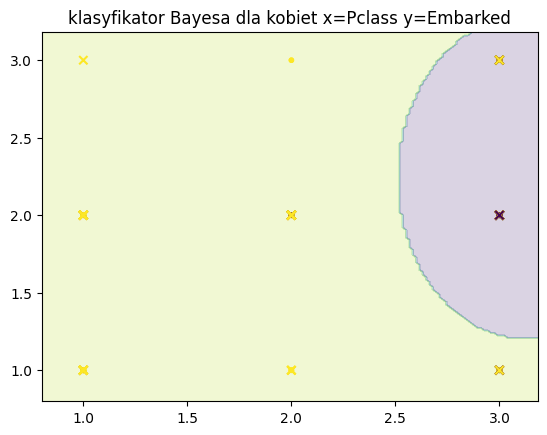

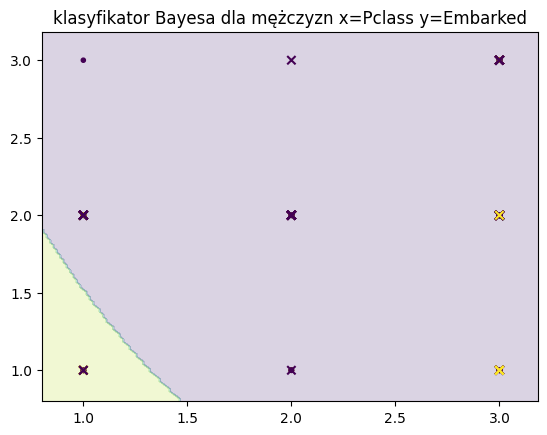

In [109]:
a1=0
a2=5
show_output1(dane[dane['Sex']==0].drop('Sex', axis=1),a1,a2,"Bayesa", "dla kobiet")
show_output1(dane[dane['Sex']==1].drop('Sex', axis=1),a1,a2,"Bayesa", "dla mężczyzn")


Wnioski:
* Otrzymane wyniki pokazują, że płeć jest kluczowym czynnikiem wpływającym na przeżycie na Titanicu - kobiety miały większe szanse na przeżycie
* Dokładność klasyfikacji w przypadku, gdy uwzględniamy atrybut płeć jest wyższa o ok. 0,1.
* Analiza przeprowadzona osobno dla kobiet i mężczyzn pozwoliła na lepsze wychwycenie zależności specyficznych dla danej grupy. Np. Przeżywalność dla mężczyzn była bardziej ograniczona ze względu na pierwszeństwo ratowania kobiet i dzieci, więc w większym stopniu zależało m.in. od klasy
